## Text content cleaning

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import WordPunctTokenizer

In [ ]:
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
  try:
      bom_removed = text.decode("utf-8-sig").replace(u"\ufffd", "?")
  except:
      bom_removed = text
  stripped = re.sub(combined_pat, '', bom_removed)
  stripped = re.sub(www_pat, '', stripped)
  lower_case = stripped.lower()
  neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
  letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
  # During the letters_only process two lines above, it has created unnecessay white spaces,
  # I will tokenize and join together to remove unneccessary white spaces
  words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
  # words = [x for x  in tok.tokenize(neg_handled) if len(x) > 1]
  return (" ".join(words)).strip()

In [ ]:
df = pd.read_csv('/content/tweets_total.csv')
total_len = df.shape[0]

In [ ]:
print(df.at[0,'text'])
df.at[0,'text'] = tweet_cleaner(df.at[0,'text'])
print(df.at[0,'text'])

PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E McKinney DENTON COUNTY JAIL. Covid19 Outbreak. Released Trustee repo… https://t.co/zNAAr9CQZp
protestors needed pm pm daily now mckinney denton county jail covid outbreak released trustee repo


In [ ]:
for i in range(total_len):
  df.at[i,'text'] = tweet_cleaner(df.at[i,'text'])
  print('Processing ' + str(i+1) + '//' + str(total_len) + '####################################################################')

In [ ]:
print(df.at[5,'text'])

was bored so made this borisjohnson dumbanddumber coronavirus covid covidiots


In [ ]:
df.to_csv('tweets_total_cleaned.csv')

In [ ]:
df2 = pd.read_csv('tweets_total_cleaned.csv',usecols=['text'])
df2.iloc[:10]

,text
0,protestors needed pm pm daily now mckinney den...
1,do not take your eye off the ball there are st...
2,excellent partnership to prevent covid thank y...
3,always honored to speak about critical covid h...
4,apparently at the timberlea store in fort mcmu...
5,was bored so made this borisjohnson dumbanddum...
6,while the stands may be empty at fenway the bi...
7,chief public health officer warns of pandemic ...
8,my opponent does not care about you that it th...
9,this week the commission passed and revised lo...


In [ ]:
print(df2.at[1,'text'])

do not take your eye off the ball there are still protests going on and more and more people are dying of covid


## Stopwords cleaning & Words segmentation

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/tweets_total_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192961 entries, 0 to 192960
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  192961 non-null  int64 
 1   _id         192961 non-null  object
 2   text        192313 non-null  object
 3   created     192957 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192311 entries, 0 to 192310
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  192311 non-null  int64 
 1   _id         192311 non-null  object
 2   text        192311 non-null  object
 3   created     192311 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
total_len = df.shape[0]
total_len

192311

In [ ]:
from nltk.tokenize import TweetTokenizer
import string

nltk.download('stopwords')
sw = stopwords.words('english')
word_tokenizer = TweetTokenizer(strip_handles=True, preserve_case=False, reduce_len=True)
def remove_punc_and_stopword(text):
    punc_removed = [word for word in text if word not in string.punctuation]
    punc_removed = ''.join(punc_removed)
    punc_removed = word_tokenizer.tokenize(punc_removed)
    vocabularies = []
    for token in punc_removed :
        if token.lower() not in sw:
            vocabularies.append(token.lower())
    return vocabularies

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def rem_single_characters_and_http(lst):
    outputlst = []
    for word in lst:
      if word.startswith("http") == False:
        temp = re.sub('[^a-zA-Z ]+',' ', word) 
        temp=re.sub("&lt;/?.*?&gt;",' ',temp)
        temp=re.sub("(\\d|\\W)+"," ",temp)
        if(len(temp)<=3):
            outputlst.append(' ')        
        else:
            outputlst.append(temp)
    return outputlst

In [ ]:
nltk.download('wordnet')
filter_words = ['covid']
def lemmatizationFunct(x):
    lemmatizer = WordNetLemmatizer()
    finalLem = []
    for s in x:
      vab = lemmatizer.lemmatize(s)
      if vab.startswith(" ") == False and vab not in filter_words:
        finalLem.append(vab)
      # finalLem.append(vab)
    return finalLem

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def joinTokensFunct(x):
    x = " ".join(x)
    return x

In [ ]:
def removecharacters(text):   
    text=text.strip()
    text = re.sub('\s+', ' ', text).strip()
    return text

In [ ]:
# print(df.at[0,'text'])
# df.at[0,'text'] = joinTokensFunct(lemmatizationFunct(remove_punc_and_stopword(df.at[0,'text'])))
# print(df.at[0,'text'])

for i in range(total_len):
  df.at[i,'text'] = removecharacters(joinTokensFunct(lemmatizationFunct(rem_single_characters_and_http(remove_punc_and_stopword(df.at[i,'text'])))))
  print('Processing ' + str(i+1) + '//' + str(total_len) + '####################################################################')

流式输出内容被截断，只能显示最后 5000 行内容。
Processing 187312//192311####################################################################
Processing 187313//192311####################################################################
Processing 187314//192311####################################################################
Processing 187315//192311####################################################################
Processing 187316//192311####################################################################
Processing 187317//192311####################################################################
Processing 187318//192311####################################################################
Processing 187319//192311####################################################################
Processing 187320//192311####################################################################
Processing 187321//192311####################################################################
Processing 187322//192311########

## Word cloud 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud

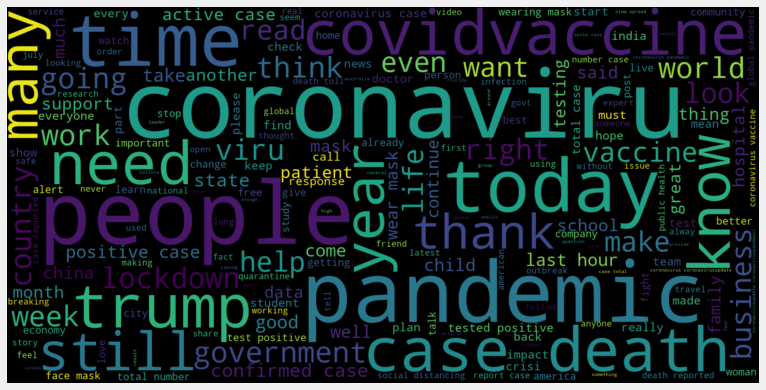

In [ ]:
all_string = []
for t in df['text']:
  all_string.append(t)
all_string = pd.Series(all_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(all_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Count vectorize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
cvec.fit(df['text'])

len(cvec.get_feature_names())

80702

In [ ]:
all_doc_matrix = cvec.transform(df['text'])
all_tf = np.sum(all_doc_matrix,axis=0)
all_words = np.squeeze(np.asarray(all_tf))
term_freq_df = pd.DataFrame([all_words],columns=cvec.get_feature_names()).transpose()

In [ ]:
term_freq_df

,0
aaabigaill,1
aaah,3
aaam,1
aaand,4
aaanndd,1
...,...
zyada,1
zydus,17
zyduscadila,7
zygote,1


In [ ]:
term_freq_df.columns = ['total_count']
term_freq_df.sort_values(by='total_count', ascending=False).iloc[:10]

,total_count
case,21235
coronavirus,16168
death,10549
people,10238
vaccine,10232
pandemic,8955
mask,7245
covidvaccine,7077
india,6086
health,5786


### Frequency plot

Text(0.5, 1.0, 'Top 500 tokens in tweets')

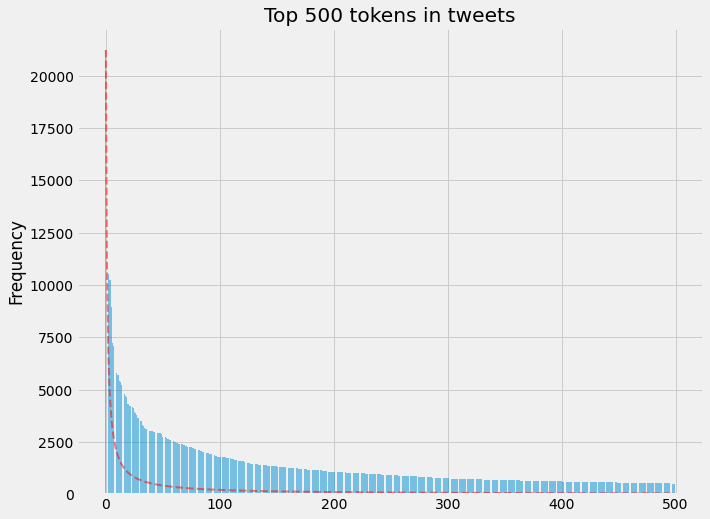

In [ ]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total_count', ascending=False)['total_count'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total_count', ascending=False)['total_count'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

### Zipf plot

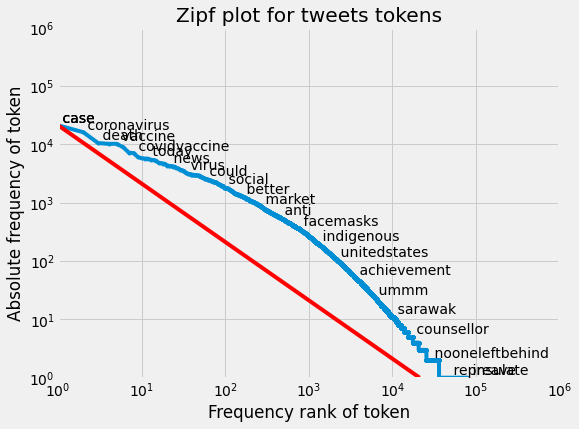

In [ ]:
from pylab import *
counts = term_freq_df.total_count
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

## TF/IDF vectorize

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tftr = TfidfTransformer()

all_doc_tfidf = tftr.fit_transform(all_doc_matrix)
all_tfidf = np.sum(all_doc_tfidf,axis=0)
all_words_tfidf = np.squeeze(np.asarray(all_tfidf))
term_tiidf_df = pd.DataFrame([all_words_tfidf],columns=cvec.get_feature_names()).transpose()

In [ ]:
term_tiidf_df

,0
aaabigaill,0.406069
aaah,1.647439
aaam,0.462432
aaand,2.056330
aaanndd,0.442040
...,...
zyada,0.403295
zydus,6.588840
zyduscadila,2.910408
zygote,0.388657


In [ ]:
term_tiidf_df.columns = ['tfidf_rate']
term_tiidf_df.sort_values(by='tfidf_rate', ascending=False).iloc[:20]

,tfidf_rate
case,4115.618602
coronavirus,3221.704684
death,2469.259567
vaccine,2140.268771
people,2037.229996
pandemic,1821.759486
covidvaccine,1728.562344
mask,1544.619768
india,1497.074928
total,1390.504341


In [ ]:
term_total = term_freq_df.join(term_tiidf_df, lsuffix='_left', rsuffix='_right')
term_total.sort_values(by='tfidf_rate', ascending=False).iloc[:20]

,total_count,tfidf_rate
case,21235,4115.618602
coronavirus,16168,3221.704684
death,10549,2469.259567
vaccine,10232,2140.268771
people,10238,2037.229996
pandemic,8955,1821.759486
covidvaccine,7077,1728.562344
mask,7245,1544.619768
india,6086,1497.074928
total,5218,1390.504341


In [ ]:
term_total.to_csv('tweets_total_wordsbag.csv',index=True)